In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-time-series/data-kiem-tra-1.csv


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from hmmlearn import hmm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
df = pd.read_csv('/kaggle/input/time-series/data-kiem-tra-2.csv',encoding='ISO-8859-1',delimiter=',')
df2 = np.loadtxt("/kaggle/input/time-series/data-kiem-tra-2.csv",encoding='latin-1', delimiter=',',skiprows=1, usecols=(2), dtype=float)

In [30]:
df.head()

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1


In [34]:
df.describe()

,truong_1,truong_2,truong_3,truong_4,truong_5
count,550038.000000,550038.000000,550038.000000,550038.000000,550038.000000
mean,6.904059,33.006940,10323.650070,682.557644,1.264864
std,1.626892,16.471457,6318.869819,1140.989924,2.017879
min,4.000000,2.000000,27.000000,0.070000,-6.000000
25%,6.000000,21.000000,4607.000000,199.000000,1.000000
50%,7.000000,31.000000,9839.000000,379.000000,1.000000
75%,8.000000,50.000000,15742.000000,749.000000,1.000000
max,10.000000,59.000000,22168.000000,59200.000000,288.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

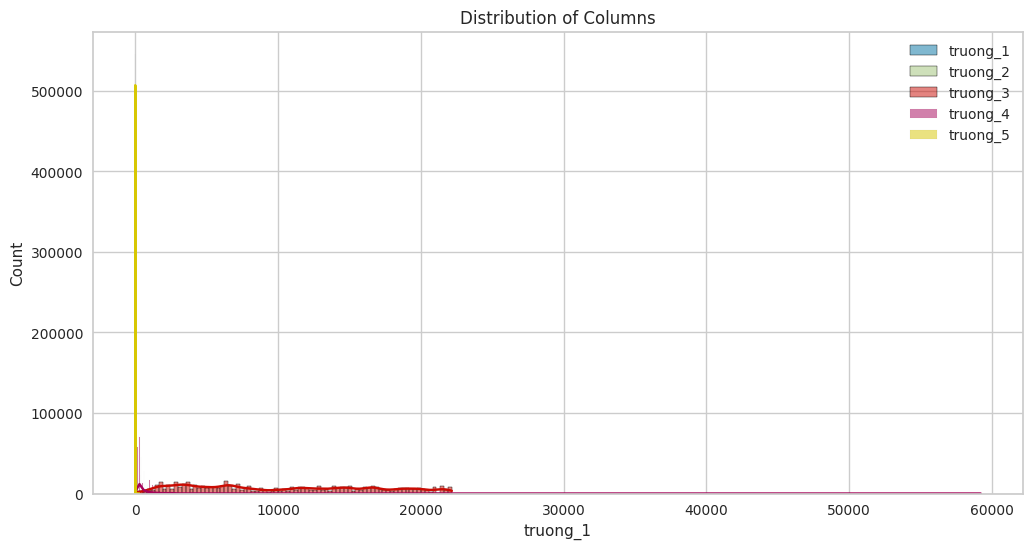

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df['truong_1'], kde=True, label='truong_1')
sns.histplot(df['truong_2'], kde=True, label='truong_2')
sns.histplot(df['truong_3'], kde=True, label='truong_3')
sns.histplot(df['truong_4'], kde=True, label='truong_4')
sns.histplot(df['truong_5'], kde=True, label='truong_5')
plt.legend()
plt.title('Distribution of Columns')
plt.show()

<Axes: >

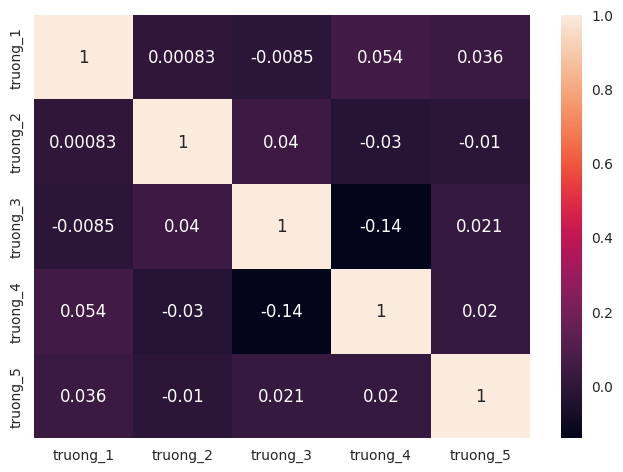

In [42]:
df_corr=df.drop(columns='date',axis=1,)
sns.heatmap(data=df_corr.corr(),annot=True)

In [31]:
print(df2)

[58. 58. 58. ... 37. 37. 37.]


In [13]:
df['truong_2'].describe()

count    481822.000000
mean         31.189028
std          15.804208
min           0.000000
25%          22.000000
50%          29.000000
75%          44.000000
max          59.000000
Name: truong_2, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


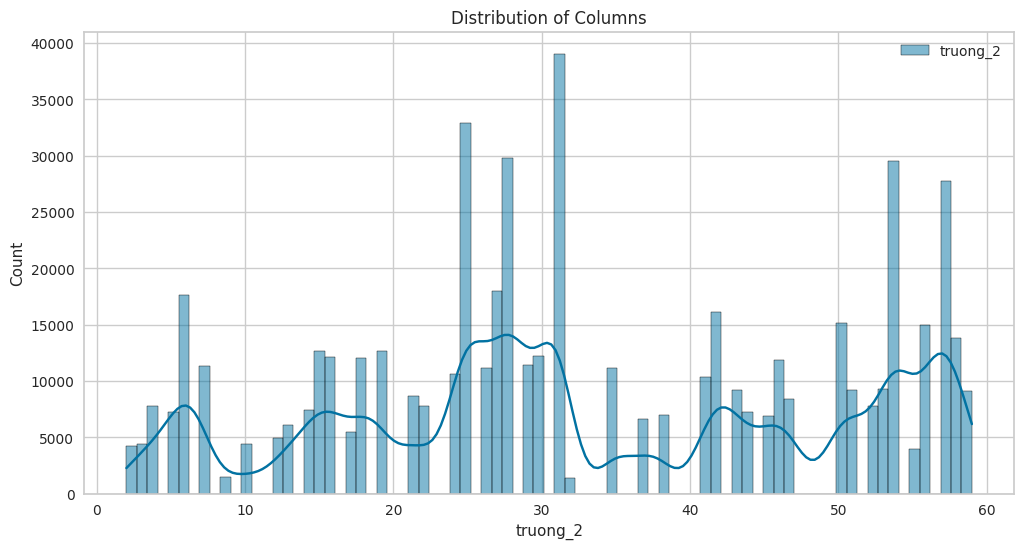

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(df['truong_2'], kde=True, label='truong_2')
plt.legend()
plt.title('Distribution of Columns')
plt.show()

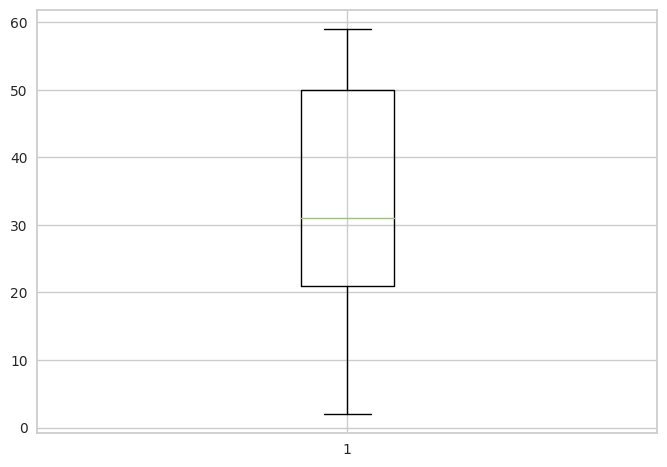

In [44]:
plt.boxplot(df['truong_2'])
plt.show()

In [28]:
# ARIMA LİBRARY
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df['truong_2'], order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()
forecast = model_fit.predict()
mse = mean_squared_error(df['truong_2'], forecast)
mae = mean_absolute_error(df['truong_2'], forecast)
rmse = np.sqrt(mse_kalman)
r2 = r2_score(df['truong_2'], forecast)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:",r2)

MSE: 0.27804904606241654
MAE: 0.023846111091054837
RMSE: 0.5273035615870773
R2: 0.9988867907230781


In [46]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 37.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [81]:
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# define model
model = arch_model(df['truong_2'], mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
forecast_horizon=10
forecast = model_fit.forecast(horizon=forecast_horizon)
am = forecast.variance
print(am)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 273500867903.09695
Iteration:      2,   Func. Count:     66,   Neg. LLF: 2628956.22309846
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2628956.223143239
            Iterations: 6
            Function evaluations: 66
            Gradient evaluations: 2
              h.01         h.02         h.03         h.04         h.05  \
550037  1197.35753  1194.692536  1191.895601  1188.957652  1185.868991   

               h.06         h.07         h.08         h.09         h.10  
550037  1182.619261  1179.197406  1175.591633  1171.789372  1167.777231  
